In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option.max_rows = None
pd.set_option.max_columns = None
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
train_data = pd.read_csv('./House-Pricing-Data/train.csv')

In [4]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
train_data.shape

(1460, 81)

In [31]:
dict = {}
dict['col_name'] = train_data.columns
dict['col_nunique'] = train_data.nunique().values

col_dist = pd.DataFrame(dict)

In [33]:
col_dist['percentage'] = col_dist.col_nunique/train_data.shape[0]

In [36]:
col_dist[col_dist.percentage > 0.5].sort_values(by='percentage', ascending=False)
#Id, LotArea, GrLivArea, BsmtUnfSF,  1stFlrSF are mostly not directly useful

,col_name,col_nunique,percentage
0,Id,1460,1.000000
4,LotArea,1073,0.734932
46,GrLivArea,861,0.589726
37,BsmtUnfSF,780,0.534247
43,1stFlrSF,753,0.515753


In [25]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,percentage_unique
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,<generator object <genexpr> at 0x1a17ffe1a8>
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,<generator object <genexpr> at 0x1a17ffe1a8>
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,<generator object <genexpr> at 0x1a17ffe1a8>
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,<generator object <genexpr> at 0x1a17ffe1a8>
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,<generator object <genexpr> at 0x1a17ffe1a8>


In [9]:
train_data.info() #Tells how many null values are there in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [44]:
df = train_data[[col for col in train_data.columns if (train_data[col].count()/train_data.shape[0] > 0.3)]] #Iterate through columns and filter by certain criteria >0.3

In [45]:
df.shape #3 columns were dropped here

(1460, 78)

In [46]:
del df['Id'] #Unique for each entry, not useful

In [47]:
df.SalePrice.describe() #Statistical description. 

count    1460.000000  
mean     180921.195890
std      79442.502883 
min      34900.000000 
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

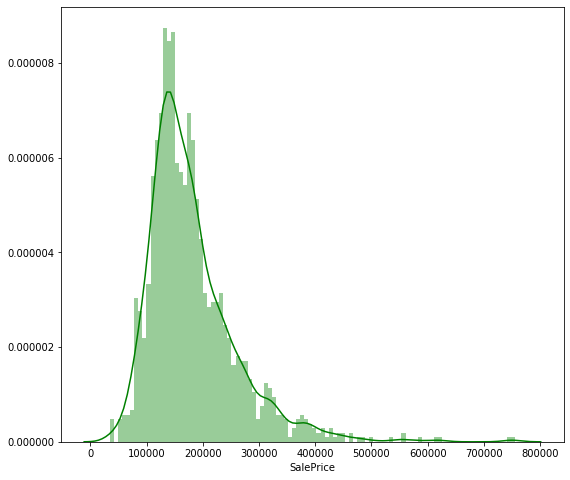

In [61]:
plt.figure(figsize=(9,8))
sns.distplot(df.SalePrice, bins=100, color='g', hist_kws={'alpha': 0.4})

In [63]:
df.dtypes.unique() #Number of unique values

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [67]:
df_num = df.select_dtypes(include=['int64','float64']) #Consider only numerical data, int or float

In [68]:
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


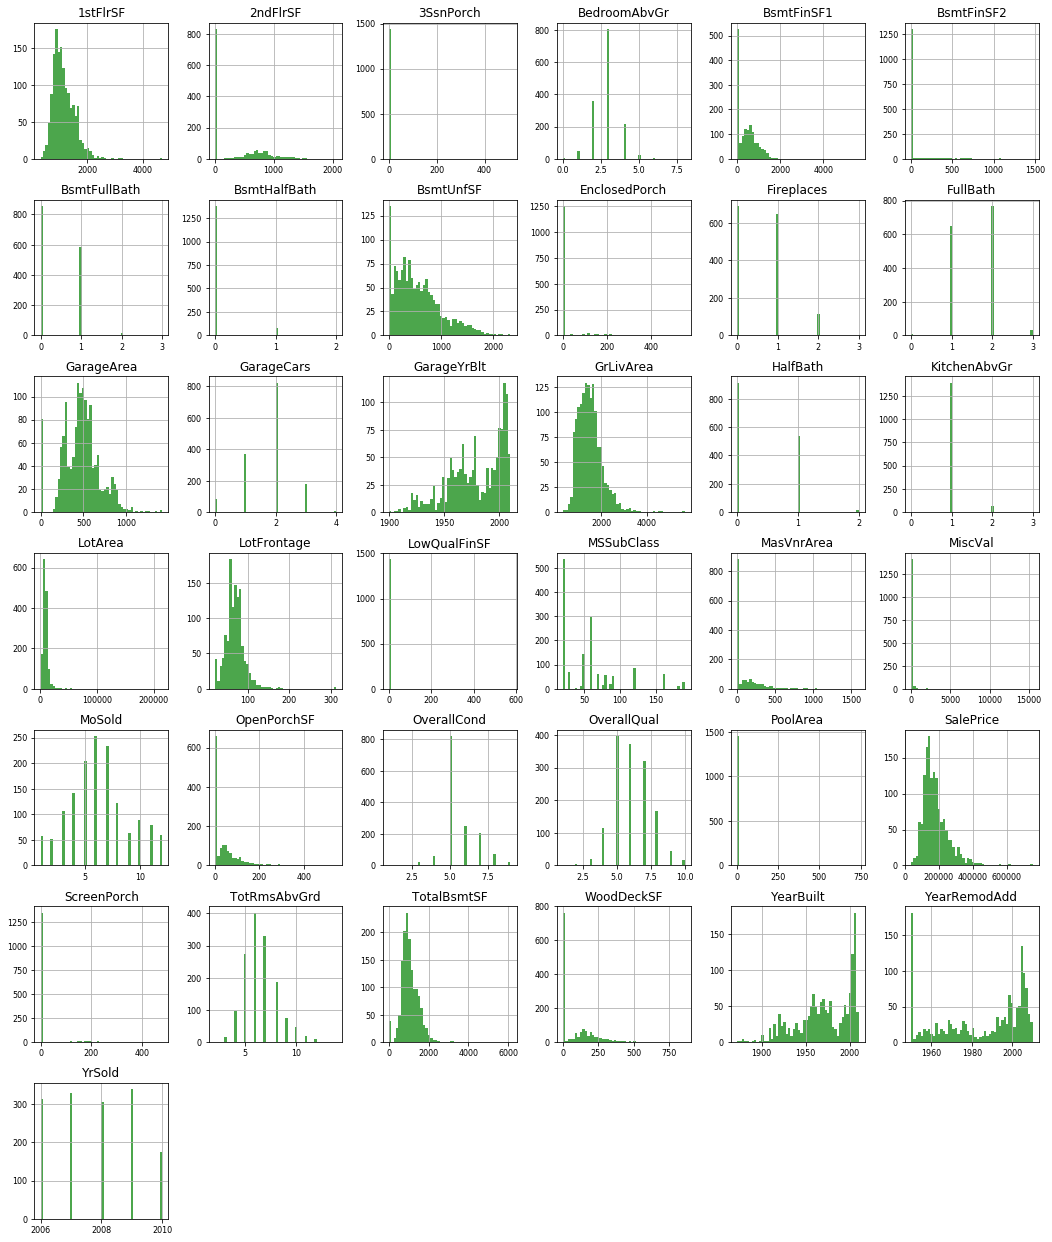

In [76]:
df_num.hist(figsize=(18,22), bins = 50, xlabelsize=8, ylabelsize=8, color='g', alpha=0.7)
plt.show()

In [77]:
df_num_corr = df_num.corr()

In [85]:
df_num_corr['SalePrice'][:-1] #Take everything but last row
features_list = df_num_corr[abs(df_num_corr['SalePrice']) > 0.5]['SalePrice'] #Take those rows where correlation with Saleprice > 0.5, and instead of taking all columns for those rows, choose only Saleprice

In [99]:
features_list.to_frame('Correlation').reset_index()[0:-1]

,index,Correlation
0,OverallQual,0.790982
1,YearBuilt,0.522897
2,YearRemodAdd,0.507101
3,TotalBsmtSF,0.613581
4,1stFlrSF,0.605852
5,GrLivArea,0.708624
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,GarageCars,0.640409
9,GarageArea,0.623431


In [102]:
features_list.index.values

array(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
       'GarageArea', 'SalePrice'], dtype=object)

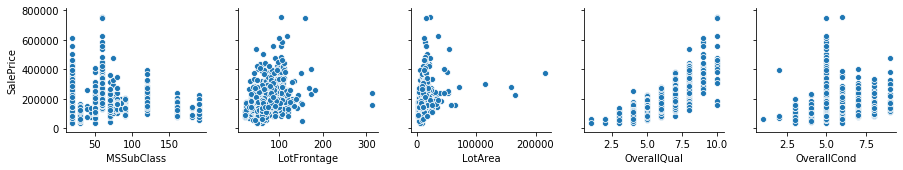

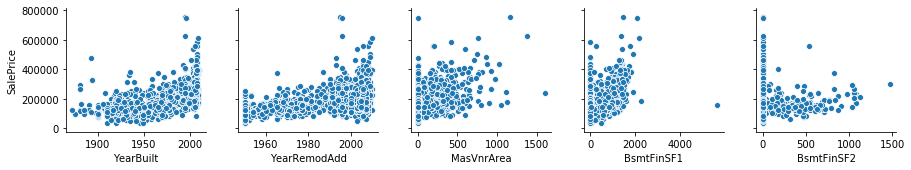

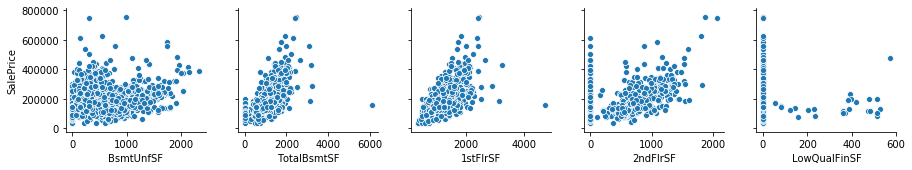

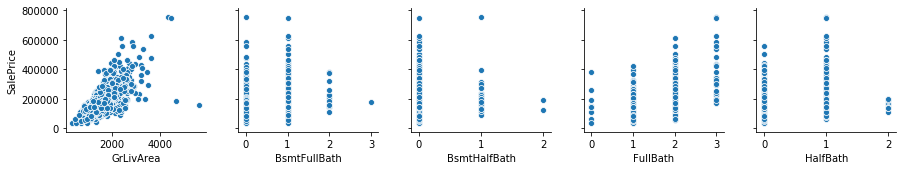

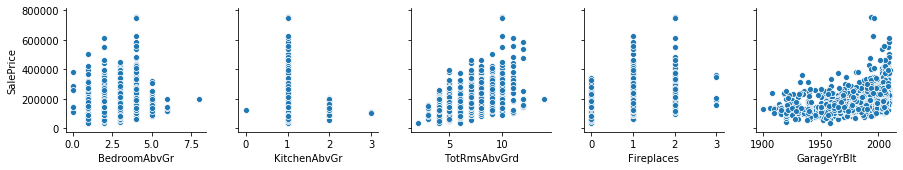

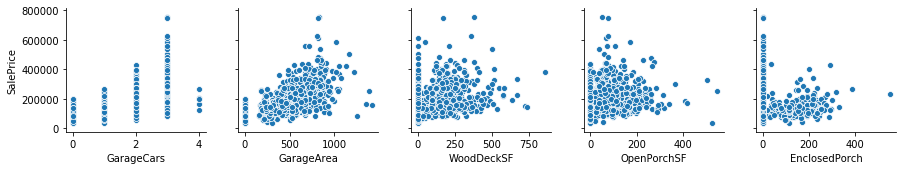

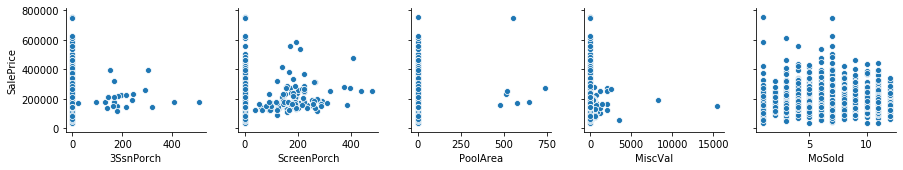

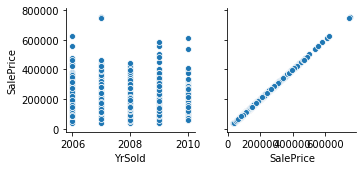

In [104]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [128]:
# A lot of zero values in a lot of variables, let's remove them, and redo corr
individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}

In [136]:
sorted_correlations = {k: v for k, v in sorted(all_correlations.items(), key=lambda item: item[1], reverse=True)} #sorting a dictionary by value, descending order

In [154]:
new_features_list = [key for key, value in sorted_correlations.items() if abs(value) >= 0.5]

In [155]:
new_features_list

['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'GarageCars',
 'TotalBsmtSF',
 'GarageArea',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [156]:
features_list

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [158]:
#Correlation by removing outliers

In [160]:
sorted_correlations

{'OverallQual': 0.7909816005838047,
 'GrLivArea': 0.7086244776126511,
 '2ndFlrSF': 0.6733048324568383,
 'GarageCars': 0.6370954062078953,
 'TotalBsmtSF': 0.6096808188074366,
 'GarageArea': 0.6084052829168343,
 '1stFlrSF': 0.6058521846919166,
 'FullBath': 0.5745626737760816,
 'TotRmsAbvGrd': 0.5337231555820238,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113867,
 'GarageYrBlt': 0.48636167748786213,
 'BsmtFinSF1': 0.4716904265235731,
 'MasVnrArea': 0.4340902197568926,
 'LotFrontage': 0.35179909657067854,
 'LowQualFinSF': 0.3000750165550133,
 'LotArea': 0.2638433538714063,
 'ScreenPorch': 0.25543007954878405,
 'EnclosedPorch': 0.2412788363011751,
 'BsmtFinSF2': 0.19895609430836586,
 'WoodDeckSF': 0.19370601237520677,
 'BedroomAbvGr': 0.18093669310849045,
 'BsmtUnfSF': 0.16926100049514192,
 'Fireplaces': 0.1216605842136395,
 'MiscVal': 0.08896338917298924,
 'OpenPorchSF': 0.08645298857147708,
 '3SsnPorch': 0.06393243256889079,
 'MoSold': 0.04643224522381936,
 'BsmtFullBa

In [164]:
#Few Other variables to check : KitchenAbvGr, GarageCars,BsmtHalfBath, FirePlace, FullBath, HalfBath, OverallCond

In [174]:
#Taking only select clumns aand creating a new dataframe other_vars
other_vars = df[['KitchenAbvGr', 'GarageCars' ,'BsmtHalfBath', 'Fireplaces', 'FullBath', 'HalfBath', 'OverallCond', 'SalePrice']]

In [175]:
other_vars.head(5)

,KitchenAbvGr,GarageCars,BsmtHalfBath,Fireplaces,FullBath,HalfBath,OverallCond,SalePrice
0,1,2,0,0,2,1,5,208500
1,1,2,1,1,2,0,8,181500
2,1,2,0,1,2,1,5,223500
3,1,3,0,1,1,0,5,140000
4,1,3,0,1,2,1,5,250000


In [177]:
other_vars.groupby('KitchenAbvGr')['SalePrice'].describe() #Remove outliers , KitchenAbvGr = 0 or 3

,count,mean,std,min,25%,50%,75%,max
KitchenAbvGr,,,,,,,,
0,1.0,127500.000000,NaN,127500.0,127500.0,127500.0,127500.00,127500.0
1,1392.0,183388.790230,80265.344315,34900.0,131300.0,165550.0,216877.75,755000.0
2,65.0,131096.153846,31483.474549,55000.0,108959.0,133900.0,145000.00,206300.0
3,2.0,109500.000000,4949.747468,106000.0,107750.0,109500.0,111250.00,113000.0


In [180]:
other_vars.groupby('GarageCars')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
GarageCars,,,,,,,,
0,81.0,103317.283951,32815.023389,34900.0,82500.0,100000.0,124000.0,200500.0
1,369.0,128116.688347,30412.386890,35311.0,110000.0,128000.0,142000.0,266500.0
2,824.0,183851.663835,51617.144258,55993.0,148000.0,177750.0,213000.0,430000.0
3,181.0,309636.121547,106832.925939,81000.0,246578.0,295000.0,367294.0,755000.0
4,5.0,192655.800000,52621.839745,123000.0,168000.0,200000.0,206300.0,265979.0


In [182]:
other_vars.groupby('BsmtHalfBath')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
BsmtHalfBath,,,,,,,,
0,1378.0,181230.330189,79303.224623,34900.0,129000.00,163250.0,215000.00,745000.0
1,80.0,176098.125000,82901.003355,91500.0,138625.00,159000.0,179925.00,755000.0
2,2.0,160850.500000,47164.729412,127500.0,144175.25,160850.5,177525.75,194201.0


In [186]:
other_vars.groupby('Fireplaces')['SalePrice'].describe() #Fireplace is an important feature

,count,mean,std,min,25%,50%,75%,max
Fireplaces,,,,,,,,
0,690.0,141331.482609,44389.786884,34900.0,112000.0,135000.0,164375.0,342643.0
1,650.0,211843.909231,79531.825318,60000.0,158000.0,189975.0,254675.0,625000.0
2,115.0,240588.539130,117451.800525,100000.0,160750.0,206900.0,284500.0,755000.0
3,5.0,252000.000000,93313.986090,160000.0,190000.0,205000.0,345000.0,360000.0


In [189]:
other_vars.groupby('FullBath')['SalePrice'].describe() #FullBath very important

,count,mean,std,min,25%,50%,75%,max
FullBath,,,,,,,,
0,9.0,165200.888889,106083.806001,35311.0,108959.0,145000.0,194201.0,385000.0
1,650.0,134751.440000,41565.080488,34900.0,112000.0,132375.0,150562.5,423000.0
2,768.0,213009.825521,72446.809159,55000.0,168500.0,196750.0,248082.0,611657.0
3,33.0,347822.909091,165185.455377,170000.0,200624.0,320000.0,430000.0,755000.0


In [192]:
other_vars.groupby('HalfBath')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
HalfBath,,,,,,,,
0,913.0,162534.884995,67450.336922,34900.0,119500.0,143000.0,190000.00,555000.0
1,535.0,212721.960748,88629.242668,61000.0,158000.0,189000.0,241000.00,755000.0
2,12.0,162028.916667,30315.705676,108959.0,138250.0,159243.5,191050.25,201800.0


In [195]:
other_vars.groupby('OverallCond')['SalePrice'].describe() #No correlation, no impact on SalePrice.

,count,mean,std,min,25%,50%,75%,max
OverallCond,,,,,,,,
1,1.0,61000.000000,NaN,61000.0,61000.0,61000.0,61000.0,61000.0
2,5.0,141986.400000,141342.813488,67000.0,76500.0,85000.0,87000.0,394432.0
3,25.0,101929.400000,44852.490403,35311.0,76000.0,89500.0,135000.0,200624.0
4,57.0,120438.438596,38922.525907,40000.0,92900.0,115000.0,143000.0,235000.0
5,821.0,203146.914738,85117.319416,34900.0,144000.0,185000.0,239686.0,745000.0
6,252.0,153961.591270,60737.969824,37900.0,124375.0,142750.0,171875.0,755000.0
7,205.0,158145.487805,53468.189431,79900.0,123500.0,145000.0,178000.0,402000.0
8,72.0,155651.736111,52375.144681,84500.0,125375.0,142500.0,170750.0,335000.0
9,22.0,216004.545455,96485.974689,110500.0,143500.0,176200.0,287875.0,475000.0


In [179]:
df_new = df[(df['KitchenAbvGr'] > 0) & (df['KitchenAbvGr'] < 3)] #KitchenAabvGr is an important feature

In [181]:
df_new = df_new[df_new['GarageCars'] < 4] #GarageCars is an important feature

In [184]:
df_new = df_new[df_new['BsmtHalfBath'] < 2] #BsmtHalfBath is an important feature

In [188]:
df_new = df_new[df_new['Fireplaces'] < 3]

In [191]:
df_new = df_new[df_new['FullBath'] > 0]

In [193]:
df_new = df_new[df_new['HalfBath'] < 2]

In [201]:
new_features_list.extend(['BsmtHalfBath', 'HalfBath', 'Fireplaces', 'KitchenAbvGr'])

In [202]:
#df_final = df[[feature for feature in new_features_list]]
#df_final.head(5)

,OverallQual,GrLivArea,2ndFlrSF,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Fireplaces,KitchenAbvGr,BsmtHalfBath,HalfBath,Fireplaces,KitchenAbvGr,BsmtHalfBath,HalfBath,Fireplaces,KitchenAbvGr
0,7,1710,854,2,856,548,856,2,8,2003,...,0,1,0,1,0,1,0,1,0,1
1,6,1262,0,2,1262,460,1262,2,6,1976,...,1,1,1,0,1,1,1,0,1,1
2,7,1786,866,2,920,608,920,2,6,2001,...,1,1,0,1,1,1,0,1,1,1
3,7,1717,756,3,756,642,961,1,7,1915,...,1,1,0,0,1,1,0,0,1,1
4,8,2198,1053,3,1145,836,1145,2,9,2000,...,1,1,0,1,1,1,0,1,1,1


In [207]:
#Correlated Features ?
df_new_corr = df_new.corr()

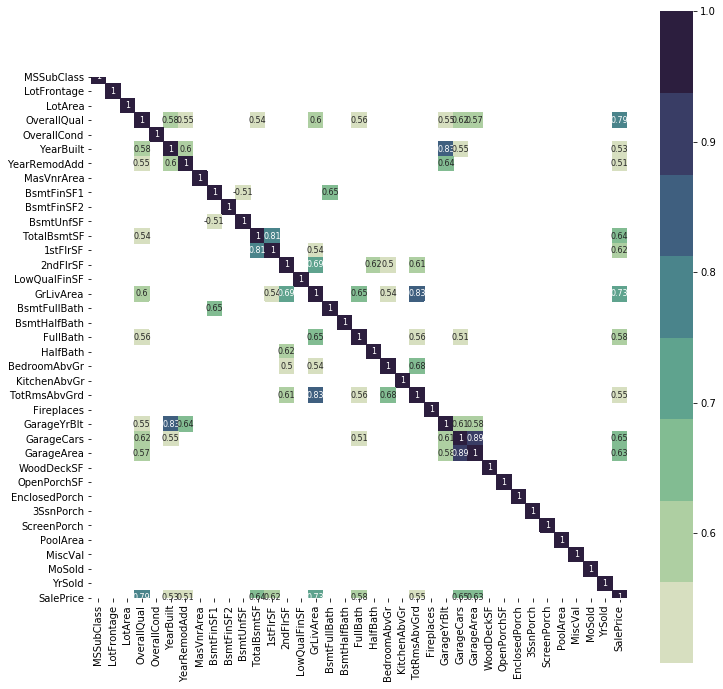

In [226]:

plt.figure(figsize=(12,12))
#cmap = sns.light_palette(color="green")
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75)
sns.heatmap(df_new_corr[(df_new_corr >=0.5) | (df_new_corr <=-0.5)], robust=True, cmap=cmap, annot=True, square=True, annot_kws={"size":8})

In [239]:
#GarageCars and GarageArea are correlated obviously #GarageCars has higher correlation with SalePrice (0.65) => remove GarageArea
#YearBiuilt and GarageYearBuilt are correlated (0.83), as they both indicate year of building. But they can be different, so need to keep both
#GrLivArea and TotRmsAbvGrd are correlated (0.83) but not self-explainable. Need to check by adding and removing the feature
#1stFlrSF and 2ndFlrSF are correlated (0.81) but it's explainable. Most likely, the 2nd floor depends on how big the first floor is. #Can remove 2ndFlrSF

In [230]:
df_new[df_new.GarageYrBlt != df_new.YearBuilt].shape[0] / df_new.shape[0] #25% have a different year when the garage came up

0.2517482517482518

In [233]:
df_new[df_new.GarageYrBlt != df_new.YearBuilt][['YearBuilt', 'GarageYrBlt']]

,YearBuilt,GarageYrBlt
3,1915,1998.0
15,1929,1991.0
26,1951,2005.0
27,2007,2008.0
29,1927,1920.0
...,...,...
1440,1922,1993.0
1445,1966,1990.0
1448,1910,1950.0
1449,1970,NaN


In [238]:
df_new[df_new['1stFlrSF'] != df_new['2ndFlrSF']][['1stFlrSF', '2ndFlrSF']]

,1stFlrSF,2ndFlrSF
0,856,854
1,1262,0
2,920,866
3,961,756
4,1145,1053
...,...,...
1455,953,694
1456,2073,0
1457,1188,1152
1458,1078,0


# Quantitative-Quantitative relationship

In [240]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df_new[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


In [241]:
features_to_analyse = [x for x in quantitative_features_list if x in new_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse


['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'SalePrice']

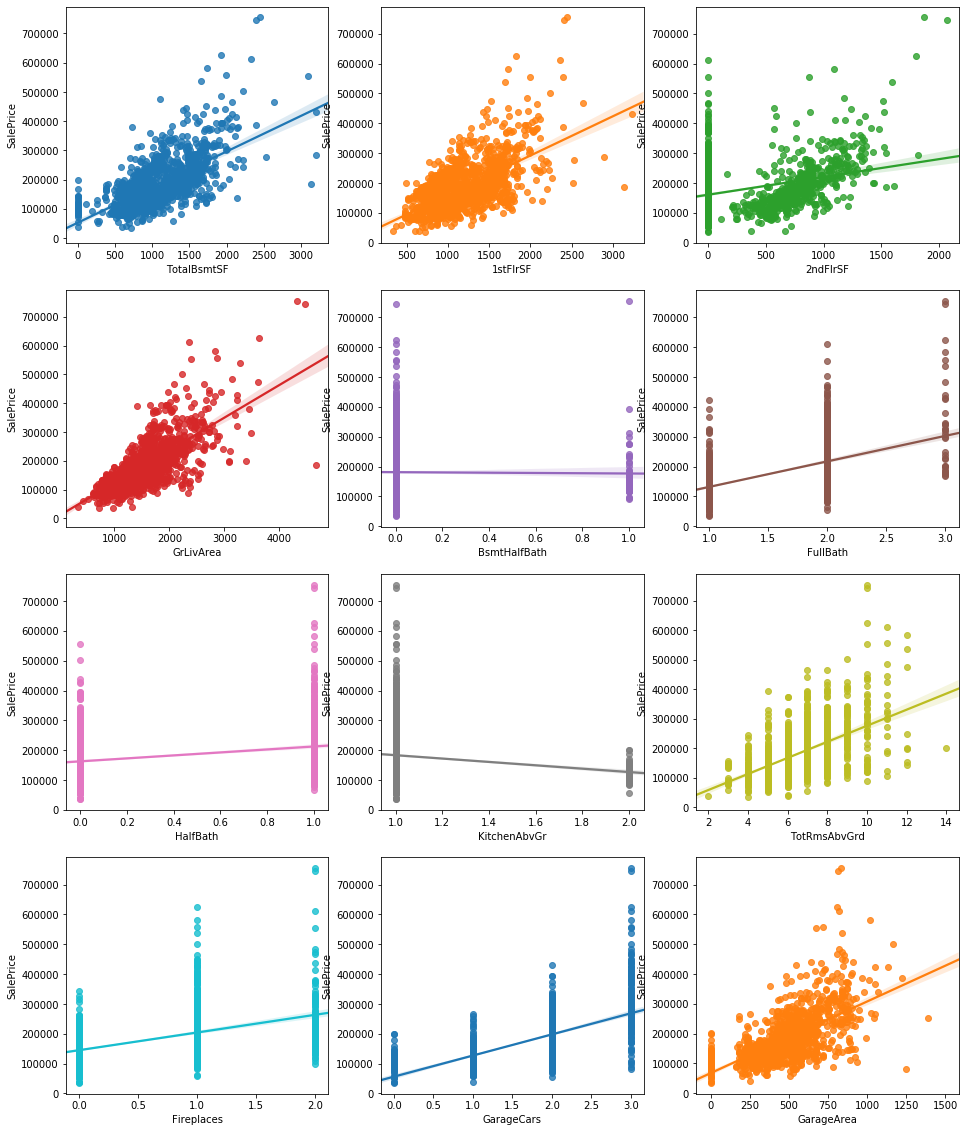

In [242]:
fig, ax = plt.subplots(round(len(features_to_analyse)/3), 3, figsize=(16,20))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i], y='SalePrice', data=df_new[features_to_analyse], ax=ax)

# Categorical to Quantitative relationship

In [243]:
categorical_features = [a for a in quantitative_features_list[:-1] + df_new.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df_new.columns.tolist())]
df_categ = df_new[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice,percentage_unique
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,2,2008,WD,Normal,208500,<generator object <genexpr> at 0x1a17ffe1a8>
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,5,2007,WD,Normal,181500,<generator object <genexpr> at 0x1a17ffe1a8>
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,9,2008,WD,Normal,223500,<generator object <genexpr> at 0x1a17ffe1a8>
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000,<generator object <genexpr> at 0x1a17ffe1a8>
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,12,2008,WD,Normal,250000,<generator object <genexpr> at 0x1a17ffe1a8>


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

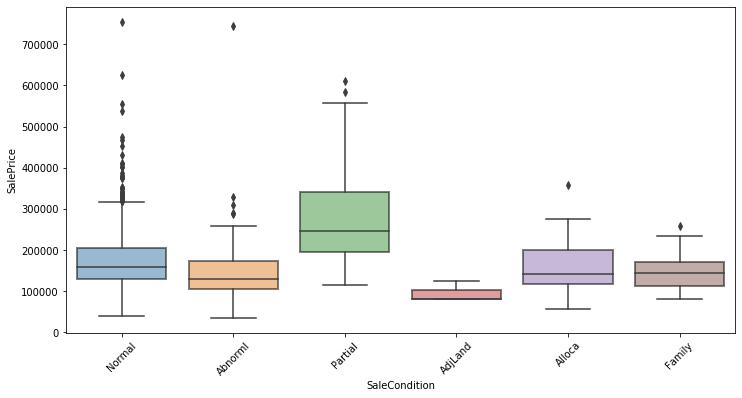

In [244]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

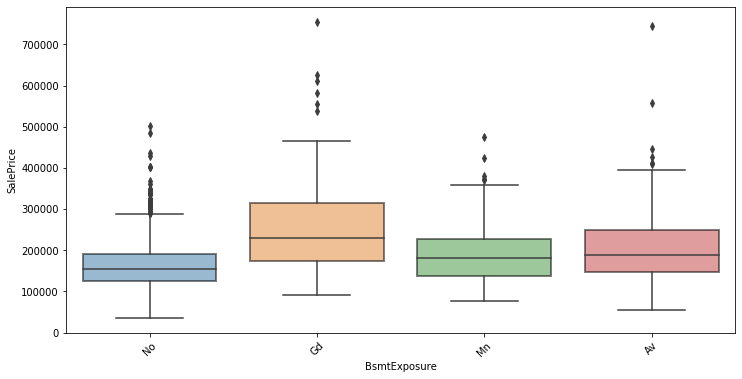

In [247]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

IndexError: index 40 is out of bounds for axis 0 with size 40

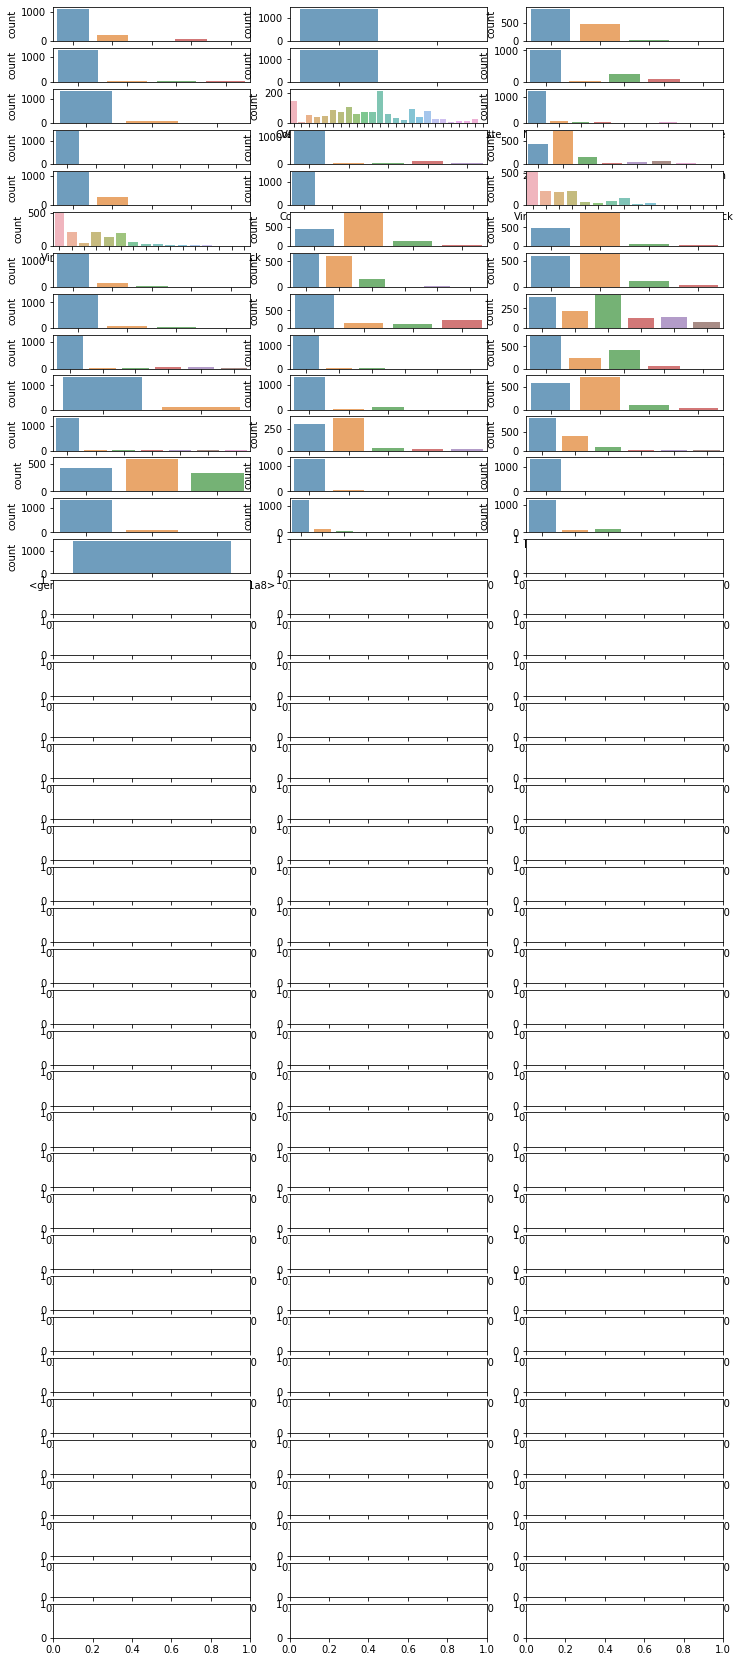

In [249]:
df_not_num = df_categ.select_dtypes(include = ['O'])
fig, ax = plt.subplots(round(len(df_not_num.columns)), 3, figsize=(12,30))
for i, ax in enumerate(fig.axes):
    sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)